<a href="https://colab.research.google.com/github/sahilnagarkar36/AI-DL/blob/main/1Keras_and_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as p

In [ ]:
df = pd.read_csv('winequality-red.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
import tensorflow as tf

In [ ]:
# 75% of the data is selected
train_df = df.sample(frac=0.75, random_state=4)


In [ ]:
# it drops the training data
# from the original dataframe
val_df = df.drop(train_df.index)

In [ ]:

# calling to (0,1) range
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)

In [ ]:
range = max_val - min_val
train_df = (train_df - min_val)/(range)

val_df =  (val_df- min_val)/range

In [ ]:

# now let's separate the targets and labels
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']

In [ ]:
# We'll need to pass the shape
# of features/inputs as an argument
# in our model, so let's define a variable
# to save it.
input_shape = [X_train.shape[1]]

input_shape

[11]

In [ ]:

model = tf.keras.Sequential([
tf.keras.layers.Dense(units=1,input_shape=input_shape)])

In [ ]:
# after you create your model it's
# always a good habit to print out it's summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model = tf.keras.Sequential([

    tf.keras.layers.Dense(units=64, activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                768       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam',

              # MAE error is good for
              # numerical predictions
              loss='mae')

In [ ]:
losses = model.fit(X_train, y_train,

                   validation_data=(X_val, y_val),

                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256,
                   epochs=15,  # total epoch

                   )

Epoch 1/15
5/5 [==============================] - 1s 59ms/step - loss: 0.4278 - val_loss: 2.6271
Epoch 2/15
5/5 [==============================] - 0s 11ms/step - loss: 0.2623 - val_loss: 4.3404
Epoch 3/15
5/5 [==============================] - 0s 15ms/step - loss: 0.1619 - val_loss: 9.6082
Epoch 4/15
5/5 [==============================] - 0s 14ms/step - loss: 0.1585 - val_loss: 11.7511
Epoch 5/15
5/5 [==============================] - 0s 14ms/step - loss: 0.1581 - val_loss: 10.3885
Epoch 6/15
5/5 [==============================] - 0s 14ms/step - loss: 0.1409 - val_loss: 8.6248
Epoch 7/15
5/5 [==============================] - 0s 12ms/step - loss: 0.1325 - val_loss: 7.6606
Epoch 8/15
5/5 [==============================] - 0s 16ms/step - loss: 0.1267 - val_loss: 7.2891
Epoch 9/15
5/5 [==============================] - 0s 13ms/step - loss: 0.1197 - val_loss: 7.0503
Epoch 10/15
5/5 [==============================] - 0s 14ms/step - loss: 0.1155 - val_loss: 6.2228
Epoch 11/15
5/5 [==========

In [ ]:
# this will pass the first 3 rows of features
# of our data as input to make predictions
model.predict(X_val.iloc[0:3, :])

1/1 [==============================] - 0s 97ms/step


array([[7.1258054],
       [9.507445 ],
       [7.5438485]], dtype=float32)

In [ ]:
y_val.iloc[0:3]

0     5.0
9     5.0
12    5.0
Name: quality, dtype: float64

In [ ]:

loss_df = pd.DataFrame(losses.history)

<Axes: >

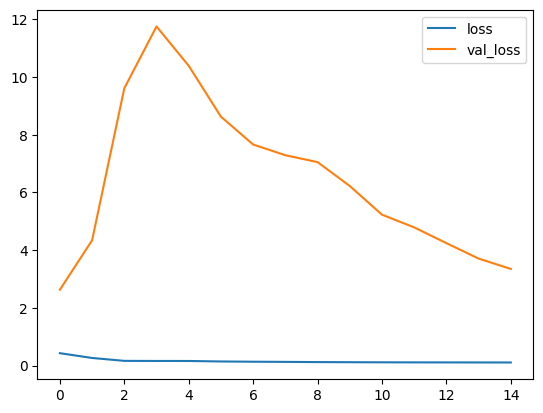

In [ ]:
# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()